# Polinômio Interpolador de Newton (Diferenças Divididas)

## Interpolação Linear

Excluindo-se o caso de função constante, a forma mais simples de interpolação é ligar dois pontos dados com uma reta. Usando semelhança de triângulos entre nós e valores de função, obtemos

$$ \dfrac{f_1(x) − f(x_0)}{x − x_0} = \dfrac{f(x_1) − f(x_0)}{x_1 − x_0} $$

a qual pode ser reorganizada para fornecer

$$ f_1(x) = f(x_0) + \dfrac{f(x_1) − f(x_0)}{x_1 − x_0} (x − x_0) \qquad (1) $$

A notação $f_1(x)$ indica que esse é um polinômio interpolador de primeiro grau. Observe que, além de representar a inclinação da reta ligando os pontos, o termo $[f(x_1) − f(x_0)]/(x_1 − x_0)$ é uma aproximação por diferenças divididas da primeira derivada.

## Interpolação Quadrática

Com três pontos, a interpolação quadrática é obtida a partir de

$$ f_2(x) = b_0 + b_1(x − x_0) + b_2(x − x_0)(x − x_1) \qquad (2) $$

Um procedimento simples pode ser usado para determinar os valores dos coeficientes.

Para $b_0$, a Equação (2) com $x = x_0$ pode ser usada para calcular

$$ b_0 = f(x_0) \qquad (3) $$

A Equação (3) pode ser substituída na Equação (2), a qual pode ser calculada em $x = x_1$ para

$$ b_1 = \dfrac{f(x_1) − f(x_0)}{x_1 − x_0} \qquad (4) $$

Finalmente, as Equações (3) e (4) podem ser substituídas na Equação (2), a qual pode ser calculada em $x = x_2$ e resolvida (depois de algumas manipulações algébricas) por 

$$ b_2 = \dfrac{\dfrac{f(x_2) − f(x_1)}{x_2 − x_1} − \dfrac{f(x_1) − f(x_0)}{x_1 − x_0}}{x_2 − x_0} \qquad (5) $$

## Forma Geral dos Polinômios Interpoladores de Newton

A análise anterior pode ser generalizada para ajustar um polinômio de grau $n$ a $n + 1$ pontos dados. O polinômio de grau $n$ é

$$ f_n(x) = b_0 + b_1(x − x_0) + \dots + b_n(x − x_0)(x − x_1) \dots (x − x_{n − 1}) \qquad (6) $$

Como foi feito anteriormente com as interpolações linear e quadrática, os pontos dados podem ser usados para calcular os coeficientes $b_0$, $b_1$, \dots , $b_n$. Para um polinômio de grau $n$, $n + 1$ pontos dados são necessários: $(x_0, f(x_0)), (x_1, f(x_1)), \dots , (x_n, f(x_n))$. Usamos esses pontos dados e as seguintes equações para calcular os coeficientes

$$
b_0 = f(x_0) \qquad (7) \\
b_1 = f[x_1, x_0] \qquad (8) \\
b_2 = f[x_2, x_1, x_0] \qquad (9) \\
\vdots \\
b_n = f[x_n, x_{n - 1}, \dots , x_1, x_0] \qquad (10)
$$

onde a função com colchetes corresponde a diferenças divididas. Por exemplo, a primeira diferença dividida finita é representada em geral por

$$ f[x_i, x_j] = \dfrac{f(x_i) − f(x_j)}{x_i − x_j} $$

A segunda diferença dividida finita, que representa a diferença das duas primeiras diferenças divididas, é expressa em geral por

$$ f[x_i, x_j, x_k] = \dfrac{f[x_i , x_j] − f[x_j, x_k]}{x_i − x_k} $$

Analogamente, a n-ésima diferença dividida é

$$ f[x_n, x_{n − 1}, \dots , x_1, x_0] = \dfrac{f[x_n, x_{n − 1}, \dots , x_1] − f[x_{n − 1}, x_{n − 2}, \dots , x_0]}{x_n − x_0} $$

## Funções de Base de Newton

Código gerador de funções de base de Newton de grau $n$ por computação simbólica.

In [25]:
from sympy import Symbol

def symbolic_vector(n,var):
    """Cria uma lista com n variáveis simbólicas.
    
        entrada:
            n: numero de pontos
            var: uma string (ex. 'x')
        saida:
            V: ['var0','var1',...,'varn-1']
    """
    if not isinstance(var,str):
        raise TypeError("{0} must be a string.".format(var))                 
        
    V = [Symbol(var  + str(i)) for i in range(0,n)]
        
    return V

def N_nj(X,j):
    """ Calcula a função de base de Newton N_{n,j}(x). 
        
        entrada:
            X: um vetor contendo variáveis simbólicas
    """
    # pega a variavel base passada e converte para simbólica
    x = X[1]
    x = str(x)
    x = Symbol(x[0:-1])
    N = x/x;
    if j > 0: 
        for k in range(0,j):
            N *= (x - X[k])
            
    return N

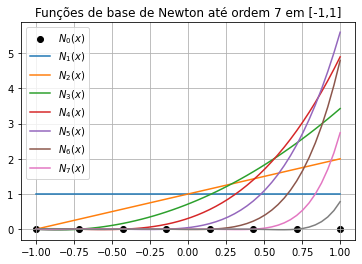

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# número de nós de interpolação: interpolação de (n-1)-ésimo grau
n = 8

# domínio de interpolação
x0,x1 = -1,1

# constroi vetor simbolico em x
X = symbolic_vector(n,'x')

# constroi pontos numericos 
xp = np.linspace(x0,x1,num=n,endpoint=True)

# cria malha numérica
xv = np.linspace(x0,x1)

# matriz das funções
Y = np.zeros((n,len(xv)))
for i in range(0,n):
    Y[i,] = np.zeros(np.shape(xv))

# montagem de dict para substituição: [xk,x0,x1,x2,...]
k = [str(i) for i in X]
k.insert(0,'x')

# preenche matriz
for i in range(0,Y.shape[0]):
    for j in range(0,np.size(xv)):
        v = list(np.concatenate([np.asarray([xv[j]]),xp]))
        d = dict(zip(k,v))
        Y[i,j] = N_nj(X,i).subs(d)

# plotagem das funções

# nós 
plt.scatter(xp,np.zeros(xp.shape),c= 'k')

leg = []
for i in range(0,Y.shape[0]):
    plt.plot(xv,Y[i,])
    s = '$N_{' + str(i) + '}(x)$'
    leg.append(s)
        
plt.grid()        
plt.legend(leg,loc='best')
plt.title('Funções de base de Newton até ordem ' + str(n-1) + ' em ['+str(x0)+','+str(x1)+']');

### Exemplo: 

Encontre o polinômio interpolador de Newton de ordem 1 $P_1(x)$ para a tabela abaixo

|x|y|
|-|-|
|-1|4|
|0|1|

Compute o valor de $P_1(0.35)$.

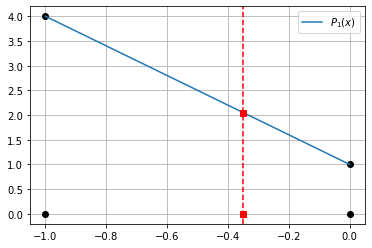

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# interpolação linear

# coeficiente a0 = y0
# coeficiente a1 = (y1-y0)/(x1-x0)

# pontos
x0,y0 = -1,4
x1,y1 =  0,1

# ordem 0
a0 = y0

# interpolador de Newton
a1 = (y1-y0)/(x1-x0)
P1 = lambda x: a0 + a1*(x-x0)

# ponto interpolado
xp = -0.35
yp = P1(xp)
yp

# plotagem

# nós
plt.plot([x0,x1],[0,0],'ok')

# valores nodais
plt.plot([x0,x1],[y0,y1],'ok')

# interpolador
x = np.linspace(x0,x1,30,endpoint=True)
plt.plot(x,P1(x),label='$P_1(x)$')

# ponto interpolado
plt.plot(xp,0,'sr')
plt.plot(xp,yp,'sr')
plt.axvline(xp,0,yp,c='r',ls='dashed')

plt.grid()
plt.legend(loc='best');

In [4]:
P1(xp)

2.05

### Exemplo: 

Encontre o polinômio interpolador de Newton de ordem 2 $P_2(x)$ para a tabela abaixo

|x|y|
|-|-|
|-1|4|
|0|1|
|2|-1|

Compute o valor de $P_2(0.35)$.

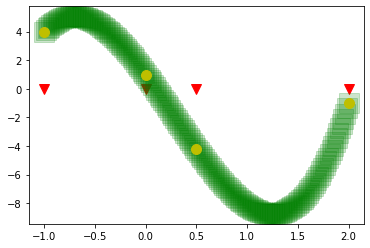

In [94]:
# leitura de planilha / dataset
x,y = np.loadtxt('t.txt',unpack=True)

x = np.concatenate( (x, [0.5]) )
y = np.concatenate( (y, [-4.2]) )

for i in range(len(x)):
    exec(f'x{i} = {x[i]}')
    exec(f'y{i} = {y[i]}')


DD0 = y0 # f[x0]
DD1 = (y1 - y0)/(x1 - x0) # f[x0,x1]
DD2 =  ( (y2 - y1)/(x2 - x1) - (y1 - y0)/(x1 - x0) ) / ( x2 - x0 )
DD3 =  ( ( (y3 - y2)/(x3 - x2) - (y2 - y1)/(x2 - x1) ) / ( x3 - x1 ) - DD2 ) / (x3 - x0)

# interpolante
PIN_2 = lambda x: DD0 + DD1*(x - x0) + DD2*(x - x0)*(x - x1)
PIN_3 = lambda x: PIN_2(x) + DD3*(x - x0)*(x - x1)*(x - x2)

plt.plot(x,y*0,'vr',ms=10, alpha=1)
xx = np.linspace(x.min(),x.max(),180)
plt.plot(xx,PIN_3(xx),'sg',ms = 20, alpha=0.2)
plt.plot(x,y,'oy',ms=10, alpha=1)

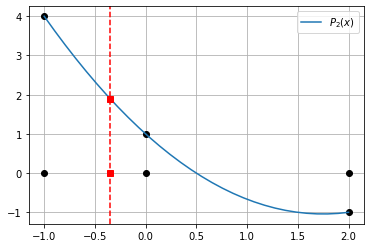

In [5]:
# interpolação quadrática

# Usando tabela DD: 
# https://vnicius.github.io/numbiosis/interpolador-newton/index.html


# par adicional 
x2,y2 = 2.,-1.

# coeficiente a2 = f[x0,x1,x2] = ( f[x1,x2] - f[x0,x1] ) / (x2 - x0)
# a2 = ( (y2-y1)/(x2-x1) - (y1-y0)/(x1-x0) )/(x2-x0)*(xx-x0)*(xx-x1)

# interpolador de Newton
P2 = lambda xx: P1(xx) + ( ( (y2-y1)/(x2-x1) - (y1-y0)/(x1-x0) )/(x2-x0) )*(xx-x0)*(xx-x1)


# ponto interpolado
yp = P2(xp)
yp

# plotagem

# nós
plt.plot([x0,x1,x2],[0,0,0],'ok')

# valores nodais
plt.plot([x0,x1,x2],[y0,y1,y2],'ok')

# interpolador
x = np.linspace(x0,x2,30,endpoint=True)
plt.plot(x,P2(x),label='$P_2(x)$')

# ponto interpolado
plt.plot(xp,0,'sr')
plt.plot(xp,yp,'sr')
plt.axvline(xp,0,yp,c='r',ls='dashed')

plt.grid()
plt.legend(loc='best');

In [6]:
P2(xp)

1.8983333333333332

### Exemplo: 

Encontre o polinômio interpolador de Newton de ordem 3 $P_3(x)$ para a tabela abaixo

|x|y|
|-|-|
|-1|4|
|0|1|
|2|-1|
|3|1|

Compute o valor de $P_3(0.35)$.

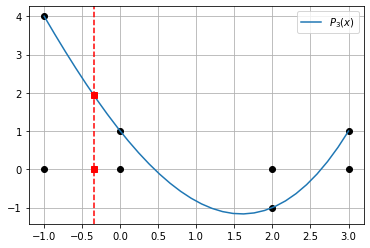

In [7]:
# interpolação quadrática

# Usando tabela DD: 
# https://vnicius.github.io/numbiosis/interpolador-newton/index.html


# par adicional 
x3,y3 = 3.,1.

# coeficiente a3 = f[x0,x1,x2,x3] 

# interpolador de Newton
P3 = lambda xxx: P2(xxx) + 1/12*(xxx-x0)*(xxx-x1)*(xxx-x2)


# ponto interpolado
yp = P3(xp)
yp

# plotagem

# nós
plt.plot([x0,x1,x2,x3],[0,0,0,0],'ok')

# valores nodais
plt.plot([x0,x1,x2,x3],[y0,y1,y2,y3],'ok')

# interpolador
x = np.linspace(x0,x3,30,endpoint=True)
plt.plot(x,P3(x),label='$P_3(x)$')

# ponto interpolado
plt.plot(xp,0,'sr')
plt.plot(xp,yp,'sr')
plt.axvline(xp,0,yp,c='r',ls='dashed')

plt.grid()
plt.legend(loc='best');

In [8]:
P3(-0.35)

1.9428854166666665

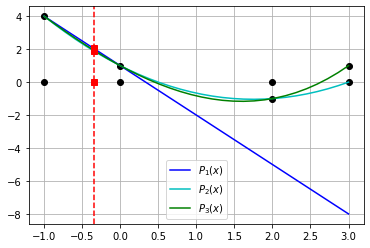

In [9]:
# ponto interpolado
YP = [P1(xp),P2(xp),P3(xp)]

# plotagem
# nós
plt.plot([x0,x1,x2,x3],[0,0,0,0],'ok')

# valores nodais
plt.plot([x0,x1,x2,x3],[y0,y1,y2,y3],'ok')

# interpoladores
x = np.linspace(x0,x3,30,endpoint=True)
plt.plot(x,P1(x),'b',label='$P_1(x)$')
plt.plot(x,P2(x),'c',label='$P_2(x)$')
plt.plot(x,P3(x),'g',label='$P_3(x)$')

# ponto interpolado
plt.plot(xp,0,'sr')
plt.plot([xp,xp,xp],YP,'sr')
plt.axvline(xp,0,max(YP),c='r',ls='dashed')

plt.grid()
plt.legend(loc='best');

## Comparação (zoom)

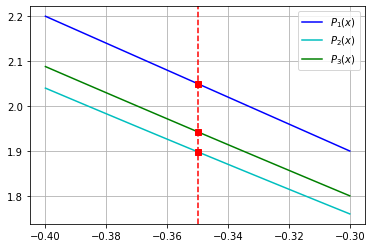

In [10]:
# interpoladores
x = np.linspace(-0.4,-0.3,30,endpoint=True)
plt.plot(x,P1(x),'b',label='$P_1(x)$')
plt.plot(x,P2(x),'c',label='$P_2(x)$')
plt.plot(x,P3(x),'g',label='$P_3(x)$')

# ponto interpolado
plt.plot([xp,xp,xp],YP,'sr')
plt.axvline(xp,0,max(YP),c='r',ls='dashed')

plt.grid()
plt.legend(loc='best');

In [11]:
import sympy as sym
from sympy.abc import x

P3x = 512 + 63*(x-2015) - 2.34*(x-2015)*(x-2017) - 2.45*(x-2015)*(x-2017)*(x-2020)
P3xn = sym.lambdify(x, P3x) 

20092402659.2048

Censo em 2021 = 775.0400000000081


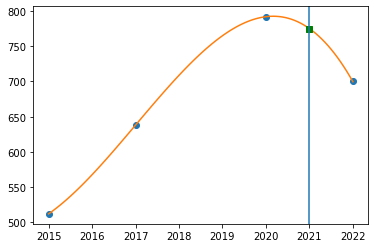

In [24]:
x = np.array([2015,2017,2020,2022])
y = np.array([512,638,792,700])

xn = np.linspace(2015,2022,num=100)

plt.plot(x,y,'o')
plt.plot(xn,P3xn(xn))

xx = 2021
yy = P3xn(xx)
plt.plot(xx,yy,'sg')
plt.axvline(x=xx)
print(f'Censo em {xx} = {yy}')